# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)



In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

You are supposed to build Bayesian classifiers that model each class using multivariate Gaussian density functions for the datasets assigned to you (under assumptions below and employing MLE approach to estimate class prior/conditional densities). This assignment is focused on handling
and analyzing data using interpretable classification models, rather than aiming solely for the best classification accuracy.

Build Bayesian models for the given case numbers (you may refer to the Chapter 2 of the book “Pattern Classification" by David G. Stork, Peter E. Hart, and Richard O. Duda):

**Case 1:** Bayes classifier with the same Covariance matrix for all classes.

**Case 2:** Bayes classifier with different Covariance matrix across classes.

**Case 3:** Naive Bayes classifier with the Covariance matrix S = $σ^2I$ same for all classes.

**Case 4:** Naive Bayes classifier with S of the above form, but being different across classes.

Refer to the provided dataset for each group, which can be found [here](https://drive.google.com/drive/folders/1NmqA9lkxXayVaCzEfRgSxSxCYSa0LEZu?usp=sharing). Each dataset includes 2D feature vectors and their corresponding class labels. There are two different datasets available:
1) Linearly separable data.
2) Non-linearly separable data.

There are 41 folders in each dataset, but you need to look at only one folder -- **the folder number assigned to you** being *RollNo\%41 + 1*.

Sample plots: [link](https://drive.google.com/drive/folders/1jhauePXVWVnmUEkmZeutuhlzosTRz1sU)




In [ ]:
# Cell type : CodeWrite

def estimateMean(data):
    """ Find the ML estimate of the mean of n-dimensional data points belonging to a class.

    Arguments:
    data: 2d array containing features

    Returns:
    meanData: mean of the n-dimensional data points


    """
    (d,n) = data.shape
    mean = np.zeros(d)
    for i in range(n):
      mean += data[:,i]
    return mean/n
def estimateCovariance(data,mean):
    """ Find the ML estimate of the covariance matrix of n-dimensional data points.

    Arguments:
    data: 2d array containing features

    Returns:
    covData: covariance of the n-dimensional data points

    """
    (d,n) = data.shape
    # for i in range(n):
    #   data[:,i] -= mean
    cov = (data @ data.T/n) - mean.reshape((2,1)) @ mean.reshape((2,1)).T
    return cov

def computeLikelihood(z, meanData,sigma):
    """ Computes the likelihood score of a data point with respect to a given class
    given the class' mean and covariance matrix

    Arguments:
    dataPoint: an n-dimensional feature vector
    meanData: mean of the class
    covData: covariance matrix of the class

    Returns:
    likelihood: likelihood score of the data point wrt the given class

    """

    # lkl = np.matmul(np.matmul(np.transpose(z-meanData),np.linalg.inv(sigma)),(z-meanData))
    temp1 = np.exp((np.matmul(np.matmul(np.transpose(z-meanData),np.linalg.inv(sigma)),(z-meanData)))/(-2))
    temp2 = ((2*np.pi)*np.sqrt(np.linalg.det(sigma)))

    lkl = temp1/temp2
    return lkl

def find_likelihood_of_grid(x,y,meanData1,meanData2,meanData3,sigma1,sigma2,sigma3):
  data_new = np.dstack((x, y))
  (n1,n2,n3) = data_new.shape


  z_new1 = np.zeros((n1,n2))
  z_new2 = np.zeros((n1,n2))
  z_new3 = np.zeros((n1,n2))
  for i in range(n1):
    for j in range(n2):
      a= computeLikelihood(data_new[i,j],meanData1,sigma1)
      b= computeLikelihood(data_new[i,j],meanData2,sigma2)
      c= computeLikelihood(data_new[i,j],meanData3,sigma3)
      z_new1[i,j] = a
      z_new2[i,j] = b
      z_new3[i,j] = c
  return [z_new1,z_new2,z_new3]

def find_likelihood_of_data(x,meanData1,meanData2,meanData3,sigma1,sigma2,sigma3):
  data_new = x
  n1 = len(x.T)
  z_new1 = np.zeros(n1)
  z_new2 = np.zeros(n1)
  z_new3 = np.zeros(n1)
  for i in range(n1):
      z_new1[i] = computeLikelihood(data_new[:2,i],meanData1,sigma1)
      z_new2[i] = computeLikelihood(data_new[:2,i],meanData2,sigma2)
      z_new3[i] = computeLikelihood(data_new[:2,i],meanData3,sigma3)
  return [z_new1,z_new2,z_new3]

def contour_plot(x,y,lkl_1,lkl_2,lkl_3,title):
  plt.contour(x, y, lkl_1 )
  plt.contour(x, y, lkl_2)
  plt.contour(x, y, lkl_3)
  # plt.legend('class1','class2','class3')
  plt.title(title)
  plt.show()
  return

# def decision(z1,z2,z3):
#   z = np.zeros(z1.shape)
#   (n1,n2) = z1.shape
#   for i in range(n1):
#     for j in range(n2):
#       l1 = [z1[i,j],z2[i,j],z3[i,j]]
#       max1 = max(l1)
#       for k in range(1,4):
#         if max1 ==l1[k-1]:
#           z[i,j]= k

def decision(z1,z2,z3):
  z = np.zeros(z1.shape)
  (n1,n2) = z1.shape
  for i in range(n1):
    for j in range(n2):
      l1 = [z1[i,j],z2[i,j],z3[i,j]]
      a = np.argmax(l1)
      z[i,j] = a+1

  return z

def decisionfor_test(z1,z2,z3):
  z = np.zeros(z1.shape)
  n1 = len(z.T)
  for i in range(n1):
      l1 = [z1[i],z2[i],z3[i]]
      max1 = max(l1)
      for k in range(1,4):
        if max1 ==l1[k-1]:
          z[i]= k

  return z

def count_error(z_test, true_val):
  s = z_test- true_val
  t = [];
  for i in s:
    if i ==0:
      t.append(0)
    else:
      t.append(1)

  return np.sum(t)



In [ ]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

import pandas as pd
# Read the train data
df_ls = pd.read_csv('/content/train_ls.txt')
df_ls_np = np.array(df_ls)
df_ls_np = np.transpose(df_ls_np)

df_nls = pd.read_csv('/content/train_nls.txt')
df_nls_np = np.array(df_nls)
df_nls_np = np.transpose(df_nls_np)

# Compute the mean and the covariance matrices as per the 4 cases mentioned above
mean_ls_1 = estimateMean(df_ls_np[0:2,:350])
mean_ls_2 = estimateMean(df_ls_np[0:2,350:700])
mean_ls_3 = estimateMean(df_ls_np[0:2,700:])

mean_ls = estimateMean(df_ls_np[0:2,:])

cov_ls = estimateCovariance(df_ls_np[:2,:],mean_ls)

cov_ls_1 = estimateCovariance(df_ls_np[:2,:350],mean_ls_1)
cov_ls_2 = estimateCovariance(df_ls_np[:2,350:700],mean_ls_2)
cov_ls_3 = estimateCovariance(df_ls_np[:2,700:],mean_ls_3)

mean_ls_x,mean_ls_y = estimateMean(df_ls_np[:2,:])
var_ls_x = cov_ls[0,0]
var_ls_y = cov_ls[1,1]
NB_cov_ls = ((var_ls_x+var_ls_y)/2)*np.eye(2)




mean_nls_1 = estimateMean(df_nls_np[0:2,:350])
mean_nls_2 = estimateMean(df_nls_np[0:2,350:700])
mean_nls_3 = estimateMean(df_nls_np[0:2,700:])

mean_nls = estimateMean(df_nls_np[0:2,:])

cov_nls = estimateCovariance(df_nls_np[:2,:],mean_nls)

cov_nls_1 = estimateCovariance(df_nls_np[:2,:350],mean_nls_1)
cov_nls_2 = estimateCovariance(df_nls_np[:2,350:700],mean_nls_2)
cov_nls_3 = estimateCovariance(df_nls_np[:2,700:],mean_nls_3)

mean_nls_x,mean_nls_y = estimateMean(df_nls_np[:2,:])
var_nls_x = cov_nls[0,0]
var_nls_y = cov_nls[1,1]
NB_cov_nls = ((var_nls_x+var_nls_y)/2)*np.eye(2)


# mean_x,mean_y = estimateMean(df_np[:2,:])
var_ls_x1,var_ls_y1 = cov_ls_1[0,0],cov_ls_1[1,1]
var_ls_x2,var_ls_y2 = cov_ls_2[0,0],cov_ls_2[1,1]
var_ls_x3,var_ls_y3 = cov_ls_3[0,0],cov_ls_3[1,1]
NB_cov_ls_1 = np.array([[var_ls_x1,0],[0,var_ls_y1]])
NB_cov_ls_2 = np.array([[var_ls_x2,0],[0,var_ls_y2]])
NB_cov_ls_3 = np.array([[var_ls_x3,0],[0,var_ls_y3]])



var_nls_x1,var_nls_y1 = cov_nls_1[0,0],cov_nls_1[1,1]
var_nls_x2,var_nls_y2 = cov_nls_2[0,0],cov_nls_2[1,1]
var_nls_x3,var_nls_y3 = cov_nls_3[0,0],cov_nls_3[1,1]
NB_cov_nls_1 = np.array([[var_nls_x1,0],[0,var_nls_y1]])
NB_cov_nls_2 = np.array([[var_nls_x2,0],[0,var_nls_y2]])
NB_cov_nls_3 = np.array([[var_nls_x3,0],[0,var_nls_y3]])




In [ ]:
(df_ls_np[:2,:] @ df_ls_np[:2,:].T)/1049

array([[74.14747512, 46.99319644],
       [46.99319644, 93.55088934]])

In [ ]:
mean_ls.reshape((2,1)) @ mean_ls.reshape((2,1)).T

array([[30.00501902, 46.94386154],
       [46.94386154, 73.44525044]])

In [ ]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

# Read the test data (dev.txt)
test_ls = pd.read_csv('/content/dev_ls.txt')
test_ls_np = np.array(test_ls)
test_ls_np = np.transpose(test_ls_np)

test_nls = pd.read_csv('/content/dev_nls.txt')
test_nls_np = np.array(test_nls)
test_nls_np = np.transpose(test_nls_np)




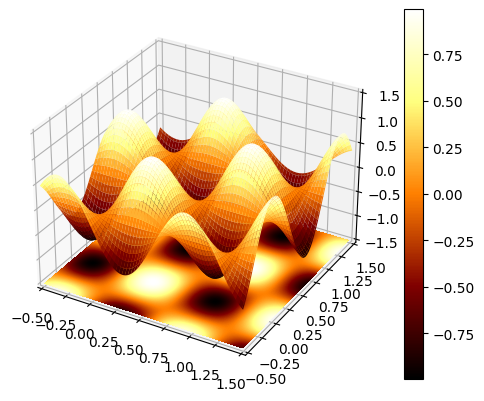

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

x= np.arange(-0.5,1.5,0.01)
y= np.arange(-0.5,1.5,0.01)
z= np.sin(10*x*y)
X,Y = np.meshgrid(x,y)
Z = np.sin(X*5)*np.cos(Y*5)
fig= plt.figure()
ax= fig.add_subplot(111, projection= '3d')
surf=ax.plot_surface(X,Y,Z,cmap='afmhot',linewidth=0,antialiased='True',rstride=3,cstride=3)
ax.contourf(X, Y, Z,1000, zdir='z', offset=-1.5,cmap='afmhot')
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])
ax.set_zlim([-1.5, 1.5])
fig.colorbar(surf)
plt.show()

In [ ]:
def contour_plot(x,y,z1,z2,z3,title):
  fig= plt.figure()
  ax= fig.add_subplot(111, projection= '3d')
  surf=ax.plot_surface(x, y, z1,cmap = 'Blues_r',linewidth=0,antialiased='True',rstride=3,cstride=3)
  surf=ax.plot_surface(x, y, z2,cmap='Blues_r',linewidth=0,antialiased='True',rstride=3,cstride=3)
  surf=ax.plot_surface(x, y, z3,cmap='Blues_r',linewidth=0,antialiased='True',rstride=3,cstride=3)
  ax.contour(x, y, z1, zdir='z', offset=-.005,cmap = 'Blues_r')
  ax.contour(x, y, z2, zdir='z', offset=-.005,cmap = 'Blues_r')
  ax.contour(x, y, z3, zdir='z', offset=-.005,cmap = 'Blues_r')
  # ax.set_xlim([-15,30])
  # ax.set_ylim([-15,30])
  # ax.set_zlim([-.005, 0.003])
  # fig.colorbar(surf)
  plt.title(title)
  plt.show()

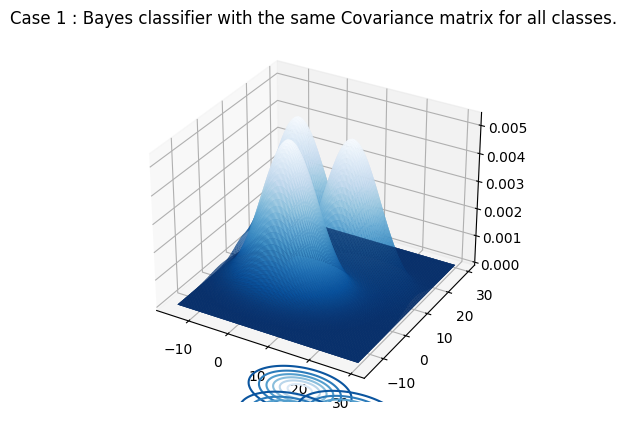

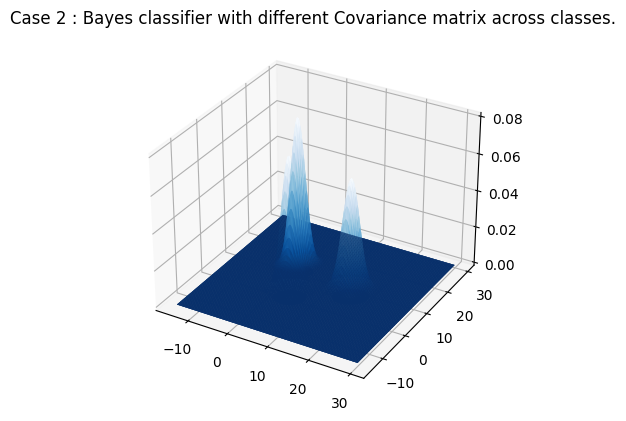

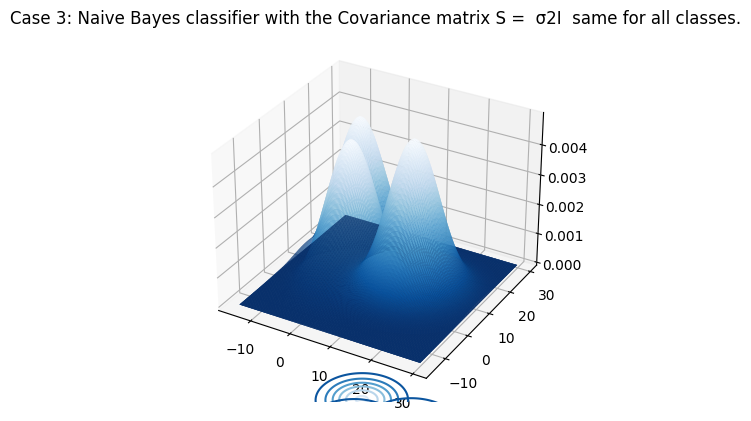

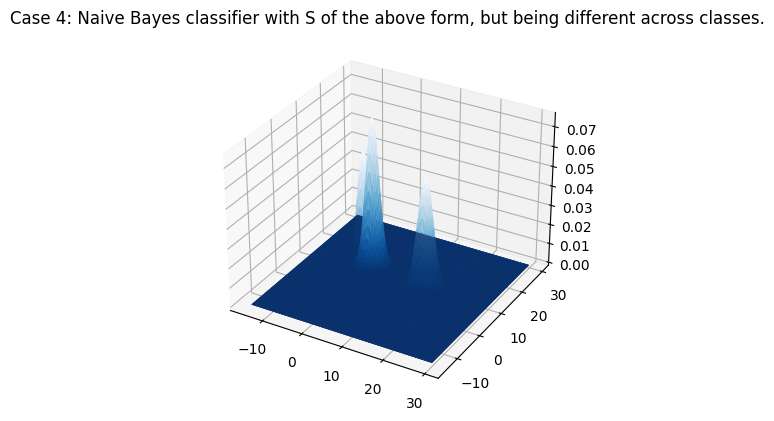

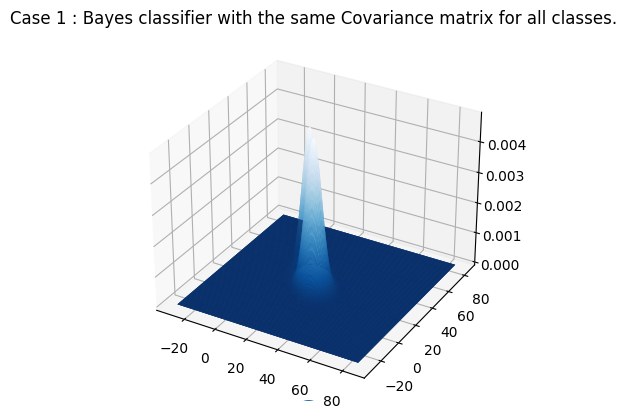

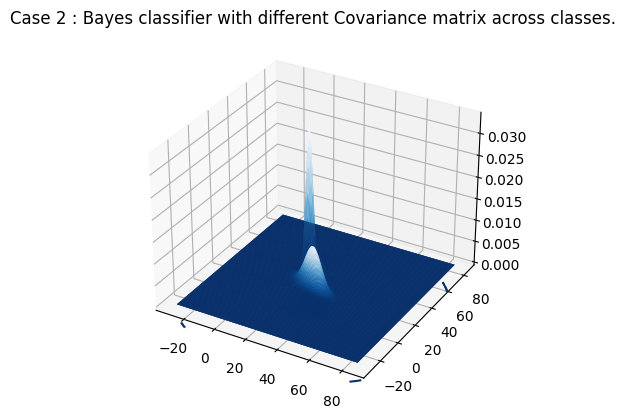

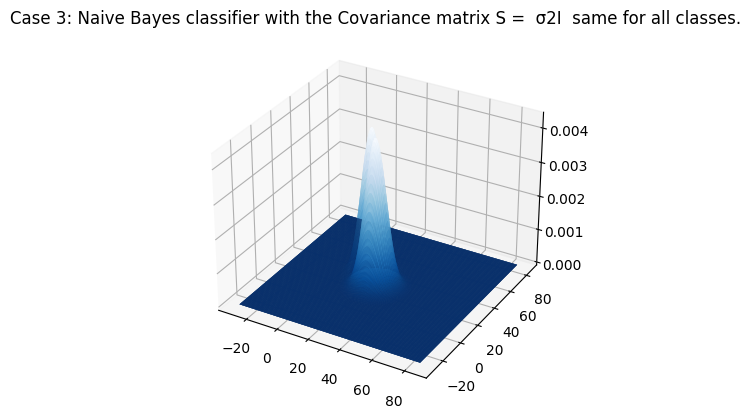

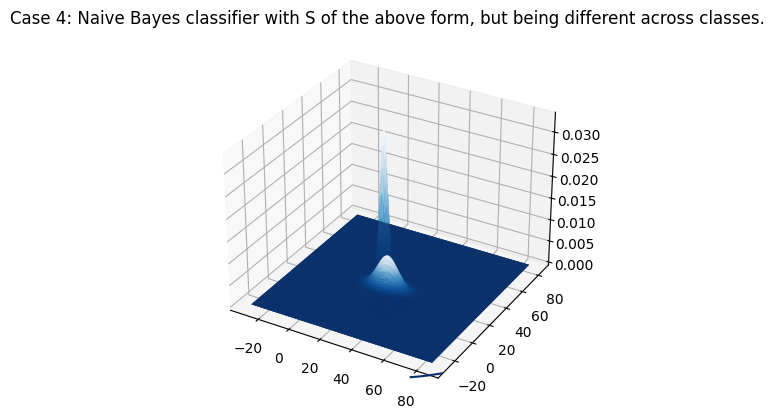

In [ ]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

# The plot of Gaussian pdfs for all classes estimated using the train data (train.txt).
# Refer to sample plots 1 and 3
# (4 Cases x_nls 2 Datasets = 8 plots)
x_ls, y_ls = np.mgrid[-15:30:.1, -15:30:.1]


[z1_case1_ls,z2_case1_ls,z3_case1_ls]=find_likelihood_of_grid(x_ls, y_ls, mean_ls_1,mean_ls_2,mean_ls_3, cov_ls, cov_ls, cov_ls)
contour_plot(x_ls,y_ls,z1_case1_ls,z2_case1_ls,z3_case1_ls,'Case 1 : Bayes classifier with the same Covariance matrix for all classes.')


[z1_case2_ls,z2_case2_ls,z3_case2_ls]=find_likelihood_of_grid(x_ls, y_ls, mean_ls_1,mean_ls_2,mean_ls_3, cov_ls_1, cov_ls_2, cov_ls_3)
contour_plot(x_ls,y_ls,z1_case2_ls,z2_case2_ls,z3_case2_ls,'Case 2 : Bayes classifier with different Covariance matrix across classes.')

[z1_case3_ls,z2_case3_ls,z3_case3_ls]=find_likelihood_of_grid(x_ls, y_ls, mean_ls_1,mean_ls_2,mean_ls_3, NB_cov_ls, NB_cov_ls, NB_cov_ls)
contour_plot(x_ls,y_ls,z1_case3_ls,z2_case3_ls,z3_case3_ls, 'Case 3: Naive Bayes classifier with the Covariance matrix S =  σ2I  same for all classes.')

[z1_case4_ls,z2_case4_ls,z3_case4_ls]=find_likelihood_of_grid(x_ls, y_ls, mean_ls_1,mean_ls_2,mean_ls_3, NB_cov_ls_1, NB_cov_ls_2, NB_cov_ls_3)
contour_plot(x_ls,y_ls,z1_case4_ls,z2_case4_ls,z3_case4_ls,'Case 4: Naive Bayes classifier with S of the above form, but being different across classes.')





x_nls, y_nls = np.mgrid[-30:85:.2, -30:85:.2]
[z1_case1_nls,z2_case1_nls,z3_case1_nls]=find_likelihood_of_grid(x_nls, y_nls,mean_nls_1,mean_nls_2,mean_nls_3, cov_nls, cov_nls, cov_nls)
contour_plot(x_nls,y_nls,z1_case1_nls,z2_case1_nls,z3_case1_nls,'Case 1 : Bayes classifier with the same Covariance matrix for all classes.')

[z1_case2_nls,z2_case2_nls,z3_case2_nls]=find_likelihood_of_grid(x_nls, y_nls,mean_nls_1,mean_nls_2,mean_nls_3, cov_nls_1, cov_nls_2, cov_nls_3)
contour_plot(x_nls,y_nls,z1_case2_nls,z2_case2_nls,z3_case2_nls,'Case 2 : Bayes classifier with different Covariance matrix across classes.')

[z1_case3_nls,z2_case3_nls,z3_case3_nls]=find_likelihood_of_grid(x_nls, y_nls,mean_nls_1,mean_nls_2,mean_nls_3, NB_cov_nls, NB_cov_nls, NB_cov_nls)
contour_plot(x_nls,y_nls,z1_case3_nls,z2_case3_nls,z3_case3_nls,'Case 3: Naive Bayes classifier with the Covariance matrix S =  σ2I  same for all classes.')

[z1_case4_nls,z2_case4_nls,z3_case4_nls]=find_likelihood_of_grid(x_nls, y_nls,mean_nls_1,mean_nls_2,mean_nls_3, NB_cov_nls_1, NB_cov_nls_2, NB_cov_nls_3)
contour_plot(x_nls,y_nls,z1_case4_nls,z2_case4_nls,z3_case4_nls,'Case 4: Naive Bayes classifier with S of the above form, but being different across classes.')



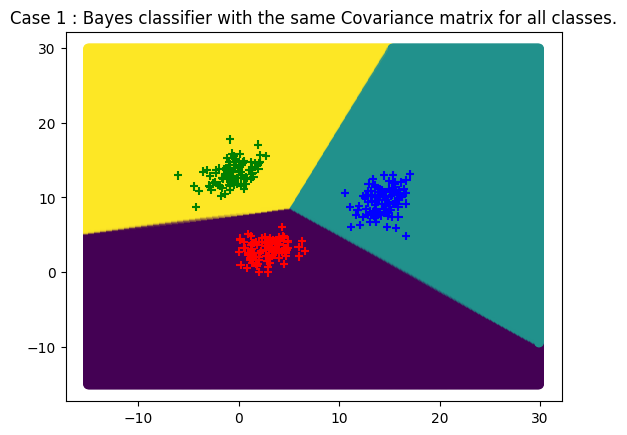

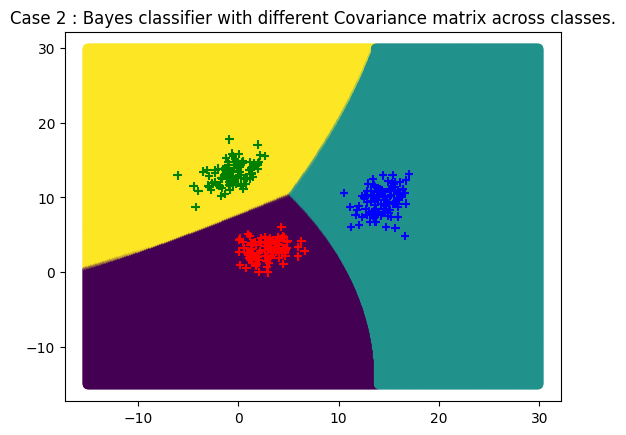

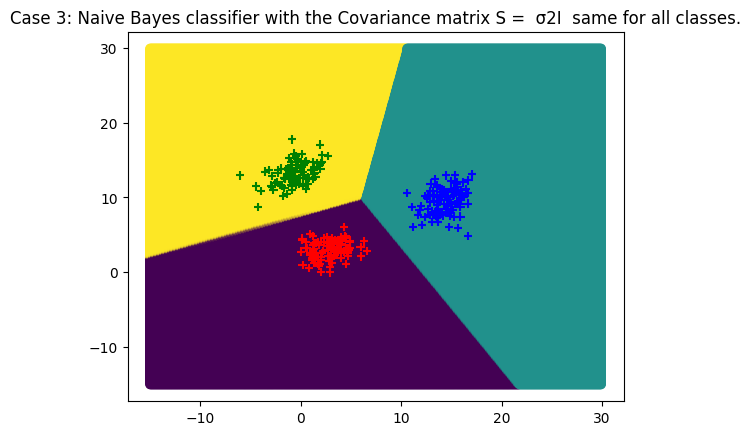

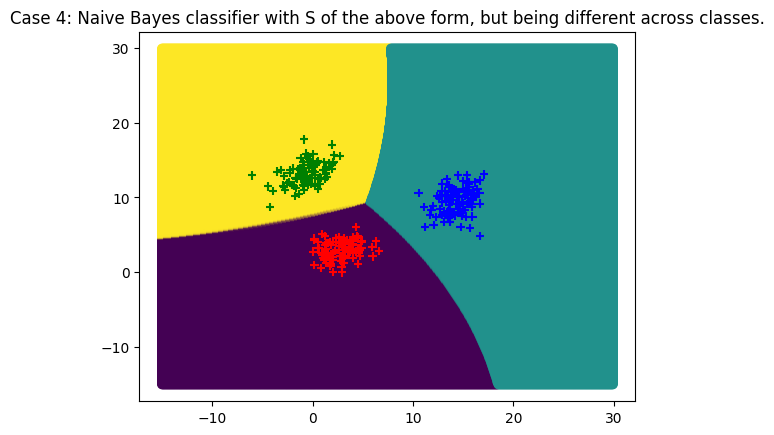

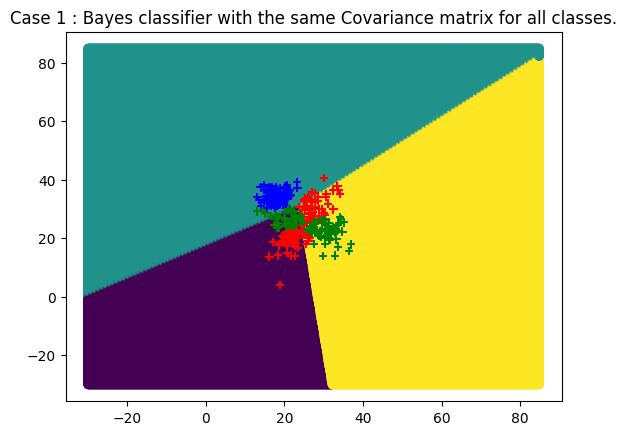

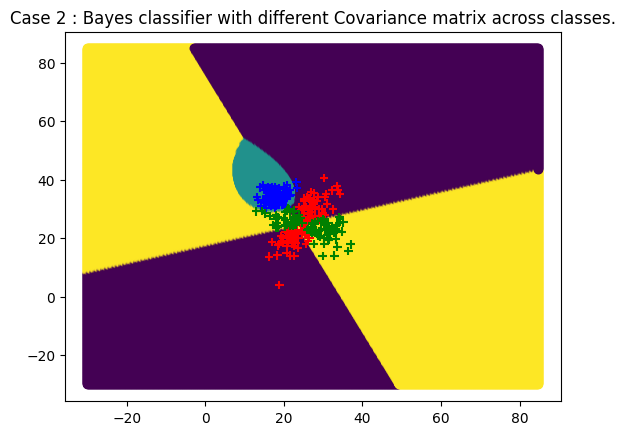

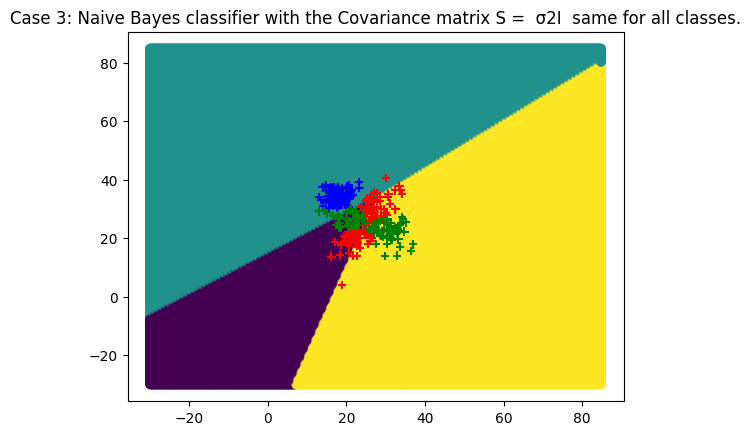

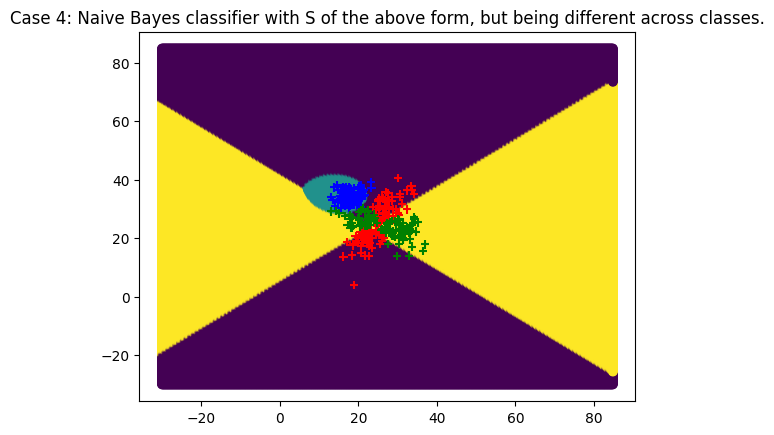

In [ ]:

# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==1:
            cols.append('red')
        elif l==2:
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# The classifiers, specifically their decision boundary/surface as a 2D plot
# along with training points marked in the plot
# Linearly separable data — sample plot 4
# Non-linearly separable data — sample plot 2
#(4 Cases x 2 Datasets = 8 plots)
# x, y = np.mgrid[-15:30:.1, -15:30:.1]
x_ls, y_ls = np.mgrid[-15:30:.1, -15:30:.1]
cols_ls=pltcolor(test_ls_np[2,:])


z_case1_ls = decision(z1_case1_ls,z2_case1_ls,z3_case1_ls)

plt.scatter(x_ls, y_ls, c= z_case1_ls)
plt.scatter(test_ls_np[0,:],test_ls_np[1,:],c=cols_ls, marker = '+')
# matplotlib.Axes.set_xlim([-15,30])
# matplotlib.Axes.set_ylim([-15,30])
plt.title('Case 1 : Bayes classifier with the same Covariance matrix for all classes.')
plt.show()

z_case2_ls = decision(z1_case2_ls,z2_case2_ls,z3_case2_ls)
plt.scatter(x_ls, y_ls, c= z_case2_ls)
plt.scatter(test_ls_np[0,:],test_ls_np[1,:],c=cols_ls, marker = '+')
plt.title('Case 2 : Bayes classifier with different Covariance matrix across classes.')
plt.show()
z_case3_ls = decision(z1_case3_ls,z2_case3_ls,z3_case3_ls)
plt.scatter(x_ls, y_ls, c= z_case3_ls)
plt.scatter(test_ls_np[0,:],test_ls_np[1,:],c=cols_ls, marker = '+')
plt.title('Case 3: Naive Bayes classifier with the Covariance matrix S =  σ2I  same for all classes.')
plt.show()
z_case4_ls = decision(z1_case4_ls,z2_case4_ls,z3_case4_ls)
plt.scatter(x_ls, y_ls, c= z_case4_ls)
plt.scatter(test_ls_np[0,:],test_ls_np[1,:],c=cols_ls, marker = '+')
plt.title('Case 4: Naive Bayes classifier with S of the above form, but being different across classes.')
plt.show()

x, y = np.mgrid[-30:85:.5, -30:85:.5]
cols_nls=pltcolor(test_nls_np[2,:])


z_case1_nls = decision(z1_case1_nls,z2_case1_nls,z3_case1_nls)
plt.scatter(x_nls, y_nls, c= z_case1_nls)
plt.scatter(test_nls_np[0,:],test_nls_np[1,:],c=cols_nls, marker = '+')
plt.title('Case 1 : Bayes classifier with the same Covariance matrix for all classes.')
plt.show()
z_case2_nls = decision(z1_case2_nls,z2_case2_nls,z3_case2_nls)
plt.scatter(x_nls, y_nls, c= z_case2_nls)
plt.scatter(test_nls_np[0,:],test_nls_np[1,:],c=cols_nls, marker = '+')
plt.title('Case 2 : Bayes classifier with different Covariance matrix across classes.')
plt.show()
z_case3_nls = decision(z1_case3_nls,z2_case3_nls,z3_case3_nls)
plt.scatter(x_nls, y_nls, c= z_case3_nls)
plt.scatter(test_nls_np[0,:],test_nls_np[1,:],c=cols_nls, marker = '+')
plt.title('Case 3: Naive Bayes classifier with the Covariance matrix S =  σ2I  same for all classes.')
plt.show()
z_case4_nls = decision(z1_case4_nls,z2_case4_nls,z3_case4_nls)
plt.scatter(x_nls, y_nls, c= z_case4_nls)
plt.scatter(test_nls_np[0,:],test_nls_np[1,:],c=cols_nls, marker = '+')
plt.title('Case 4: Naive Bayes classifier with S of the above form, but being different across classes.')
plt.show()


In [ ]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

# Report the error rates for the above classifiers
# (four classifiers on the two datasets as a 4 × 2 table
# with appropriately named rows and columns).

z_new_ls_test1,z_new_ls_test2,z_new_ls_test3 = find_likelihood_of_data(test_ls_np,mean_ls_1,mean_ls_2,mean_ls_3, cov_ls, cov_ls, cov_ls)
z_test_ls_1 = decisionfor_test(z_new_ls_test1,z_new_ls_test2,z_new_ls_test3)
error_count_ls_1 = count_error(z_test_ls_1, test_ls_np[2,:])

z_new_ls_test1,z_new_ls_test2,z_new_ls_test3 = find_likelihood_of_data(test_ls_np,mean_ls_1,mean_ls_2,mean_ls_3, cov_ls_1, cov_ls_2, cov_ls_3)
z_test_ls_2 = decisionfor_test(z_new_ls_test1,z_new_ls_test2,z_new_ls_test3)
error_count_ls_2 = count_error(z_test_ls_2, test_ls_np[2,:])

z_new_ls_test1,z_new_ls_test2,z_new_ls_test3 = find_likelihood_of_data(test_ls_np,mean_ls_1,mean_ls_2,mean_ls_3, NB_cov_ls, NB_cov_ls, NB_cov_ls)
z_test_ls_3 = decisionfor_test(z_new_ls_test1,z_new_ls_test2,z_new_ls_test3)
error_count_ls_3 = count_error(z_test_ls_3, test_ls_np[2,:])

z_new_ls_test1,z_new_ls_test2,z_new_ls_test3 = find_likelihood_of_data(test_ls_np,mean_ls_1,mean_ls_2,mean_ls_3,  NB_cov_ls_1, NB_cov_ls_2, NB_cov_ls_3)
z_test_ls_4 = decisionfor_test(z_new_ls_test1,z_new_ls_test2,z_new_ls_test3)
error_count_ls_4 = count_error(z_test_ls_4, test_ls_np[2,:])



z_new_nls_test1,z_new_nls_test2,z_new_nls_test3 = find_likelihood_of_data(test_nls_np,mean_nls_1,mean_nls_2,mean_nls_3, cov_nls, cov_nls, cov_nls)
z_test_nls_1 = decisionfor_test(z_new_nls_test1,z_new_nls_test2,z_new_nls_test3)
error_count_nls_1 = count_error(z_test_nls_1, test_nls_np[2,:])

z_new_nls_test1,z_new_nls_test2,z_new_nls_test3 = find_likelihood_of_data(test_nls_np,mean_nls_1,mean_nls_2,mean_nls_3, cov_nls_1, cov_nls_2, cov_nls_3)
z_test_nls_2 = decisionfor_test(z_new_nls_test1,z_new_nls_test2,z_new_nls_test3)
error_count_nls_2 = count_error(z_test_nls_2, test_nls_np[2,:])

z_new_nls_test1,z_new_nls_test2,z_new_nls_test3 = find_likelihood_of_data(test_nls_np,mean_nls_1,mean_nls_2,mean_nls_3, NB_cov_nls, NB_cov_nls, NB_cov_nls)
z_test_nls_3 = decisionfor_test(z_new_nls_test1,z_new_nls_test2,z_new_nls_test3)
error_count_nls_3 = count_error(z_test_nls_3, test_nls_np[2,:])

z_new_nls_test1,z_new_nls_test2,z_new_nls_test3 = find_likelihood_of_data(test_nls_np,mean_nls_1,mean_nls_2,mean_nls_3,  NB_cov_nls_1, NB_cov_nls_2, NB_cov_nls_3)
z_test_nls_4 = decisionfor_test(z_new_nls_test1,z_new_nls_test2,z_new_nls_test3)
error_count_nls_4 = count_error(z_test_nls_4, test_nls_np[2,:])


error_rate = np.array([[error_count_ls_1/300, error_count_ls_2/300, error_count_ls_3/300, error_count_ls_4/300],[error_count_nls_1/300, error_count_nls_2/300, error_count_nls_3/300, error_count_nls_4/300]])
ser = pd.DataFrame(error_rate.T, index=["Case 1", "Case 2", "Case 3", "Case 4"], columns=["Linearly separable", "Non-Linearly separable"] )

ser

,Linearly separable,Non-Linearly separable
Case 1,0.0,0.293333
Case 2,0.0,0.033333
Case 3,0.0,0.286667
Case 4,0.0,0.156667


**Cell type : TextRead**

#### In the next Textwrite cell, answer briefly on whether we can use the most general “Case 2” for all datasets? If not, answer when a simpler model like “Case 1” is preferable over “Case 2”?



**Cell type : TextWrite**
Case 1 gives better answer for linearly separable data but case 2 give almost better solution than other cases for linear as well as non linear data.
so, “Case 2” is preferable over “Case 1”


**Cell type : TextRead**

#### In the next Textwrite cell, summarise your observations

**Cell type : TextWrite**
1. Bayes Classifier Works perfectly fine for linearly separable datasets.
2. Using class conditional covariance, gives better answer than other cases for non linear data but not for linearly separable.
